In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
df =  pd.read_csv('loan_borowwer_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.nunique()

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

In [9]:
df['purpose'] = pd.Categorical(df.purpose).codes

In [10]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


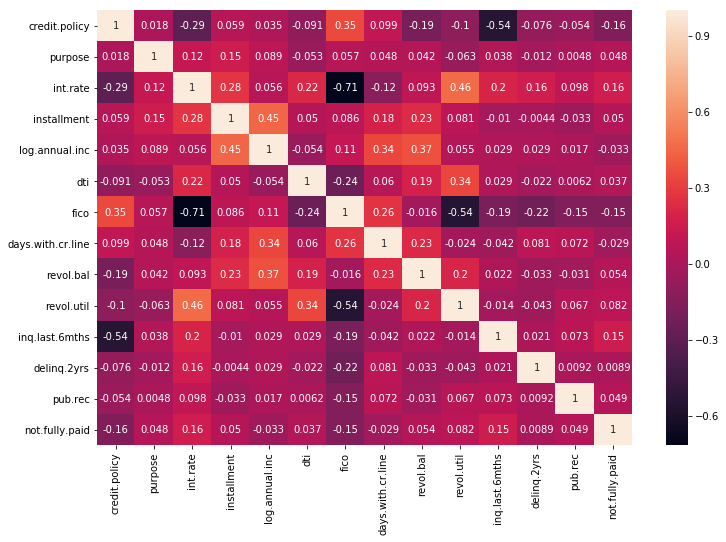

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

__fico correletaed with int.rate. So deleted fico from dataset to convert unbias.__

In [24]:
X = df.drop(['fico','not.fully.paid'],axis=1)
y = df['not.fully.paid']

In [25]:
X = StandardScaler().fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.34,random_state= 4)

### Using Random Forest ###

In [35]:
rg = RandomForestClassifier()
model = rg.fit(X_train,y_train)
y_pred = model.predict(X_test)
round(model.score(X_test,y_test)*100,2)

83.85

In [34]:
round(cross_val_score(model,X,y).mean()*100,2)

77.8

In [28]:
confusion_matrix(y_test,y_pred)

array([[2720,   45],
       [ 463,   29]], dtype=int64)

### Using Decesion Tree Classifier ###

In [32]:
dc = DecisionTreeClassifier()
moddel = dc.fit(X_train,y_train)
y_pred = model.predict(X_test)
round(model.score(X_test,y_test)*100,2)

84.4

In [33]:
round(cross_val_score(model,X,y).mean()*100,2)

76.27

In [31]:
confusion_matrix(y_test,y_pred)

array([[2720,   45],
       [ 463,   29]], dtype=int64)